In [2]:
from ludwig.api import *
import pandas as pd

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
data = pd.read_csv('./winequality-red.csv')
for dummy_i in range(len(data["quality"])):
    if data["quality"][dummy_i] < 6.5:
        data.at[dummy_i, "quality"] = 0
    else:
        data.at[dummy_i, "quality"] = 1
model_definition = {
    "input_features": [
                        {'name': 'fixed_acidity', 'type': 'numerical'},
                        {'name': 'volatile_acidity', 'type': 'numerical'},
                        {'name': 'citric_acid', 'type': 'numerical'},
                        {'name': 'residual_sugar', 'type': 'numerical'},
                        {'name': 'chlorides', 'type': 'numerical'},
                        {'name': 'free_sulfur_dioxide', 'type': 'numerical'},
                        {'name': 'total_sulfur_dioxide', 'type': 'numerical'},
                        {'name': 'density', 'type': 'numerical'},
                        {'name': 'pH', 'type': 'numerical'},
                        {'name': 'sulphates', 'type': 'numerical'},
                        {'name': 'alcohol', 'type': 'numerical'},
                      ],
    "output_features": [{'name': 'quality', 'type': 'binary'}]
    }

In [5]:
model = LudwigModel(model_definition)

In [6]:
trained_model = model.train(data)

Instructions for updating:
targets is deprecated, use labels instead


In [7]:
model.save('wine')

In [8]:
from ludwig.visualize import *
%matplotlib inline

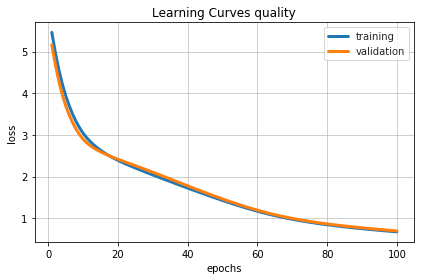

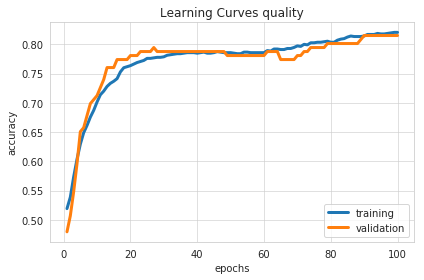

In [9]:
learning_curves(trained_model, "quality", output_directory='./graphs/')